<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_JPM_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-01 18:49:27--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.163.101, 142.251.163.138, 142.251.163.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v10b03mo0h2tl8gn5oa3shd7nf8r2vsc/1672598925000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=5470d732-de1f-41b8-9080-568918199470 [following]
--2023-01-01 18:49:30--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v10b03mo0h2tl8gn5oa3shd7nf8r2vsc/1672598925000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=5470d732-de1f-41b8-9080-568918199470
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to d

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/JPM_2008_Q4_20090115發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,JPMorgan,0.0,0.0,proper noun,compound,True,False,False,False
1,Chase,0.0,0.0,proper noun,root,True,False,False,False
2,&,0.0,0.0,coordinating conjunction,coordinating conjunction,False,False,True,False
3,Co.,0.0,0.0,proper noun,conjunct,False,False,False,False
4,(,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
10070,to,0.0,0.0,adposition,prepositional modifier,True,True,False,False
10071,you,0.0,0.0,pronoun,object of preposition,True,True,False,False
10072,next,0.0,0.0,adjective,adjectival modifier,True,True,False,False
10073,quarter,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          10075 non-null  object 
 1   Polarity      10075 non-null  float64
 2   Subjectivity  10075 non-null  float64
 3   Pos_          10075 non-null  object 
 4   Dep_          10057 non-null  object 
 5   Alpha         10075 non-null  bool   
 6   Stopword      10075 non-null  bool   
 7   Punct         10075 non-null  bool   
 8   Num           10075 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 433.0+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,JPMorgan,0.0,0.0,proper noun,compound,True,False,False,False
1,Chase,0.0,0.0,proper noun,root,True,False,False,False
5,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
7,JPM,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
11,Earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10064,everybody,0.0,0.0,pronoun,appositional modifier,True,False,False,False
10066,look,0.0,0.0,verb,root,True,False,False,False
10067,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
10069,talking,0.0,0.0,verb,complement of preposition,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
11,Earnings,0.0,0.0,noun,compound,True,False,False,False
22,CFOJames,0.0,0.0,noun,compound,True,False,False,False
51,morning,0.0,0.0,noun,compound,True,False,False,False
52,ladies,0.0,0.0,noun,appositional modifier,True,False,False,False
54,gentlemen,0.0,0.0,noun,conjunct,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10057,comments,0.0,0.0,noun,object of preposition,True,False,False,False
10066,look,0.0,0.0,verb,root,True,False,False,False
10067,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
10069,talking,0.0,0.0,verb,complement of preposition,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
56,Welcome,0.8,0.9,interjection,root,True,False,False,False
71,contain,0.0,0.0,verb,root,True,False,False,False
72,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
74,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False
75,statements,0.0,0.0,noun,direct object,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10044,like,0.0,0.0,verb,root,True,False,False,False
10054,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
10066,look,0.0,0.0,verb,root,True,False,False,False
10067,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
56,Welcome,0.800000,0.900000,interjection,root,True,False,False,False
72,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False
74,looking,0.000000,0.000000,verb,adjectival modifier,True,False,False,False
95,current,0.000000,0.400000,adjective,adjectival modifier,True,False,False,False
106,subject,-0.166667,0.333333,adjective,adjectival complement,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10025,net,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False
10029,probably,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False
10036,additional,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False
10054,additional,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    687.000000
mean       0.067360
std        0.221927
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    687.000000
mean       0.296525
std        0.330840
min        0.000000
25%        0.000000
50%        0.125000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
56,Welcome,0.800000,0.900000,interjection,root,True,False,False,False,Positive,Subjective
72,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
74,looking,0.000000,0.000000,verb,adjectival modifier,True,False,False,False,Neutral,Objective
95,current,0.000000,0.400000,adjective,adjectival modifier,True,False,False,False,Neutral,Subjective
106,subject,-0.166667,0.333333,adjective,adjectival complement,True,False,False,False,Negative,Subjective
...,...,...,...,...,...,...,...,...,...,...,...
10025,net,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
10029,probably,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
10036,additional,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
10054,additional,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,71
1,Neutral,Objective,316
2,Neutral,Subjective,110
3,Positive,Subjective,190


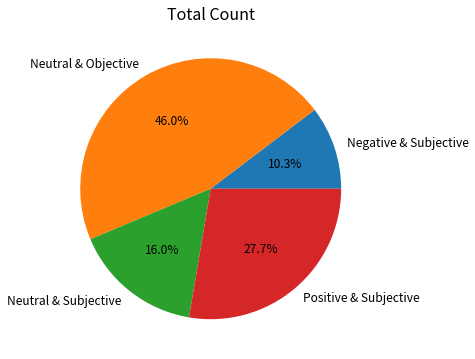

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

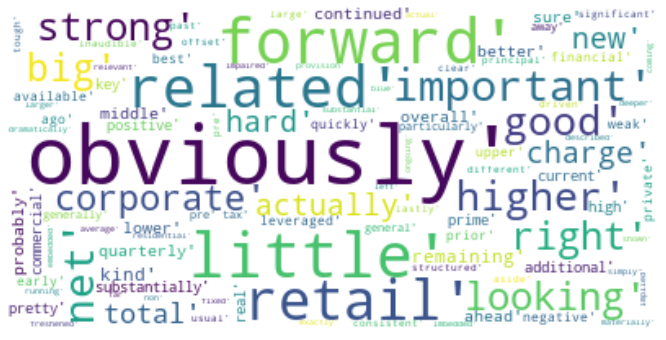

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,JPMorgan Chase & Co. (NYSE:JPM) Q4 2008 Earnin...,0.000000,0.000000
1,Welcome to the JPMorgan Chase fourth quarter 2...,0.400000,0.450000
2,Today's presentation may contain forward-looki...,0.000000,0.375000
3,Such statements are based upon the current bel...,0.052083,0.527083
4,Factors that could cause JPMorgan Chase’s actu...,-0.133333,0.300000
...,...,...,...
266,Nancy Bush – NAB ResearchCan you just give us ...,0.035000,0.360000
267,"I would point you to is on the retail side, yo...",0.000000,0.000000
268,James DimonAnd within what we kind of expected...,0.100000,0.360000
269,OperatorThere are no additional questions at t...,0.000000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    271.000000
mean       0.099537
std        0.213849
min       -0.500000
25%        0.000000
50%        0.021667
75%        0.187208
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    271.000000
mean       0.350577
std        0.258452
min        0.000000
25%        0.146429
50%        0.360000
75%        0.501910
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,JPMorgan Chase & Co. (NYSE:JPM) Q4 2008 Earnin...,0.000000,0.000000,Neutral,Objective
1,Welcome to the JPMorgan Chase fourth quarter 2...,0.400000,0.450000,Positive,Subjective
2,Today's presentation may contain forward-looki...,0.000000,0.375000,Neutral,Subjective
3,Such statements are based upon the current bel...,0.052083,0.527083,Positive,Subjective
4,Factors that could cause JPMorgan Chase’s actu...,-0.133333,0.300000,Negative,Subjective
...,...,...,...,...,...
266,Nancy Bush – NAB ResearchCan you just give us ...,0.035000,0.360000,Positive,Subjective
267,"I would point you to is on the retail side, yo...",0.000000,0.000000,Neutral,Objective
268,James DimonAnd within what we kind of expected...,0.100000,0.360000,Positive,Subjective
269,OperatorThere are no additional questions at t...,0.000000,0.000000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,53
1,Neutral,Objective,55
2,Neutral,Subjective,23
3,Positive,Subjective,140


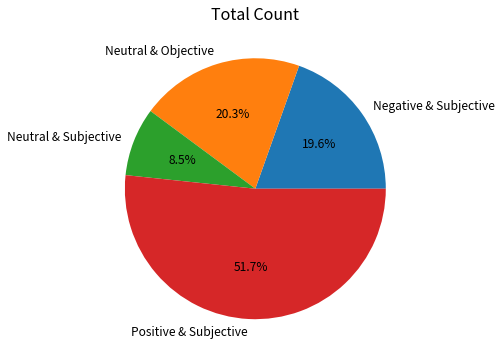

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

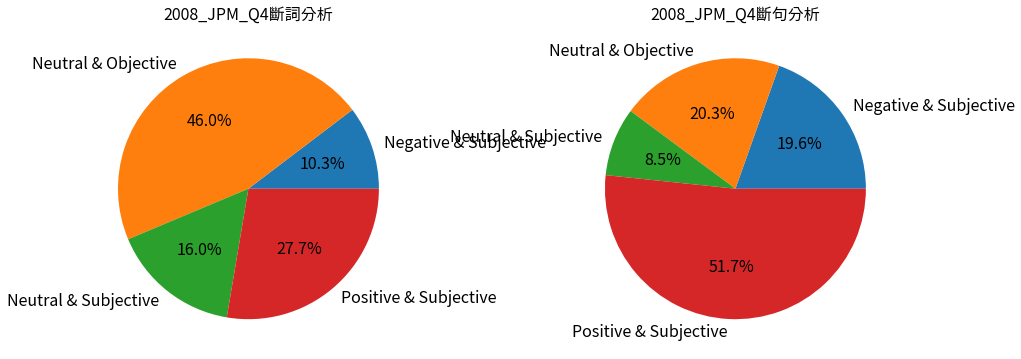

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
label2 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]


axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2008_JPM_Q4斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2008_JPM_Q4斷句分析', fontsize=16)


plt.savefig("2008_JPM_Q4.png")
from google.colab import files
files.download("2008_JPM_Q4.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
